In [ ]:
# This is predecessor code for reading in FITS images and doing other stuff
# for analysis pertinent to test FPR 0987

# Created 2021 July 6 by E.S.

In [9]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
from itertools import combinations

%matplotlib inline

# Part 1: Read in series of raw IFS images and see if opening and closing the OMSS shutter causes a change in the illumination

In [5]:
stem = "./data/fpr_0987/"

In [6]:
file_list_omss = np.sort(glob.glob(stem + "omss_illumination/*20210709*"))

In [21]:
# initialize dictionary
dict_status = {"illum_median":[],"omss":[],"illum_mean":[],"illum_sum":[]}

for fits_num in range(0,len(file_list_omss)):

    # read in raw FITS file
    hdul = fits.open(file_list_omss[fits_num])
    image_array = hdul[1].data[-1]
    omss_status = hdul[0].header["OMSSENT"]
    print(hdul[1].header["ITIME"])
    
    # measure median flux (betting that this minimizes effect of bad pixels)
    flux_median = np.nanmedian(image_array) #(image_array[1128:1222,338:505])
    flux_mean = np.nanmean(image_array)
    flux_sum = np.nansum(image_array)
    
    dict_status["illum_median"].append(flux_median)
    dict_status["illum_mean"].append(flux_mean)
    dict_status["illum_sum"].append(flux_sum)
    dict_status["omss"].append(omss_status)
    
# convert to dataframe
df = pd.DataFrame(dict_status)


59.64639
59.64639
59.64639
59.64639
599.37348
599.37348
599.37348
599.37348
599.37348
599.37348
599.37348
599.37348


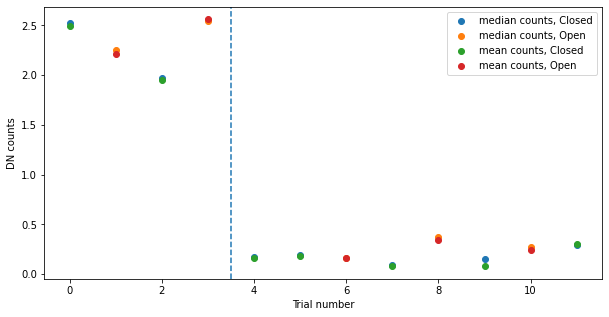

In [28]:
df["abcissa"] = np.arange(0,len(df["illum_median"]))

plt.figure(figsize=(10,5))
plt.scatter(df["abcissa"].where(df["omss"] == "CLOSED").dropna(),df["illum_median"].where(df["omss"] == "CLOSED").dropna(), label="median counts, Closed")
plt.scatter(df["abcissa"].where(df["omss"] == "OPEN").dropna(),df["illum_median"].where(df["omss"] == "OPEN").dropna(), label="median counts, Open")
plt.scatter(df["abcissa"].where(df["omss"] == "CLOSED").dropna(),df["illum_mean"].where(df["omss"] == "CLOSED").dropna(), label="mean counts, Closed")
plt.scatter(df["abcissa"].where(df["omss"] == "OPEN").dropna(),df["illum_mean"].where(df["omss"] == "OPEN").dropna(), label="mean counts, Open")
plt.axvline(x=3.5, linestyle="--")
#plt.plot(df["illum_sum"].where(df["omss"] == "CLOSED").dropna(), label="sum, Closed")
#plt.plot(df["illum_sum"].where(df["omss"] == "OPEN").dropna(), label="sum, Open")
plt.legend()
plt.xlabel("Trial number")
plt.ylabel("DN counts")
plt.savefig("junk_omss.pdf")

# Part 2: Plot changing illumination of AOWFS filter and "Show that the flux reduces for each successively narrower filter"

In [49]:
# set up data on AOWFS illumination

dict_aowfs = {"filter":["OPEN","600nm","700nm","800nm","900nm","910_to_900nm"],"counts":[2580,2540,2550,2250,805,255]}
df_aowfs = pd.DataFrame.from_dict(dict_aowfs)

In [59]:
plt.plot(dict_aowfs["counts"],marker="o")
for t in range(0,len(dict_aowfs["counts"])):
    plt.annotate(dict_aowfs["filter"][t],xy=[t,dict_aowfs["counts"][t]])
plt.ylabel("AOWFS counts")
plt.xlabel("(unitless)")
plt.savefig("junk_aowfs.pdf")

# Part 3: Read in series of IFS images and see if NRM movements were consistent